Ввод библиотек для работы основной части кода

In [1]:
import numpy as np
from math import *
import matplotlib.pyplot as plt

Создание функции согласно условию.  
Блок *if* появляется из-за ограниченности Python в поиске значений кубических корней отрицательных чисел

In [2]:
def f_x(x: float):
    # return x ** 2 + 16 / x - 16
    if x >= 3:
        return (2 * (x**2) * (x - 3)) ** (1/3)
    if x < 3:
        return (2 * (x**2) * (3 - x)) ** (1/3) * -1

Ввод дополнительной фунции для подсчета многочлена.  
Т.е. на ввод идет переменная x, и список коэффициентов многочлена. 

In [3]:
def g_x(x: np.linspace, a: list):
    y = 0
    for i in range(len(a)):
        y += float(a[i])*(x**i)
    return y

Ввод функции на поиск минимума на отрезке  

---
На ввод подаются левая и правая граница отрезка. После этого мы ищем центр отрезка *x_c*. Рассматриваем в окрестности этой точке левую и правую часть. Если левая часть "выше" правой части на графике окрестности точки *x_c*, то мы "передвигаем" левую границу к центру, иначе - правую к центру.  
Ну и циклируем это 1к раз. 

In [4]:
def fmin(x_l, x_r):
    dx = 1e-2
    for _ in range(1000):
        x_c = 0.5*(x_l + x_r)
        if f_x(x_c - dx) > f_x(x_c + dx):
            x_l = x_c
        else: x_r = x_c
    return x_c

Аналогичная функция для поиска максимума.

In [5]:
def fmax(x_l, x_r):
    dx = 1e-2
    for _ in range(1000):
        x_c = 0.5*(x_l + x_r)
        if f_x(x_c - dx) < f_x(x_c + dx):
            x_l = x_c
        else: x_r = x_c
    return x_c

Ввод констант и переменных

In [6]:
dx = 0.001
x = np.linspace(-1.3, 6.3, 200)
y = np.array([f_x(t) for t in x])

Поиск min/max в данных отрезках (*ar*) и помещение этих точек в список *pts*

In [7]:
ar = [-1, 0.5, 2.5, 4.25, 6]
pts = [[], []]
for i in range(len(ar) - 1):
    mn = fmin(ar[i], ar[i + 1])
    mx = fmax(ar[i], ar[i + 1])
    pts[0].append(mn)
    pts[1].append(f_x(mn))
    pts[0].append(mx)
    pts[1].append(f_x(mx))

Сортируем точки по значению x

In [8]:
for i in range(len(pts[0])):
    for j in range(i, len(pts[0])):
        if pts[0][i] >= pts[0][j]:
            pts[0][i], pts[0][j] = pts[0][j], pts[0][i]
            pts[1][i], pts[1][j] = pts[1][j], pts[1][i]

"Чистка" списка точек (if в точках [x_0, ..., x_n] - монотонная функция, тогда убираем точки x_1, ... , x_n-1)

In [9]:
pts_ = [[], []]
for i in range(len(pts[0])):
    if (i == 0) or (i == len(pts[0]) - 1):
        pts_[0].append(pts[0][i])
        pts_[1].append(pts[1][i])
    elif not((pts[1][i-1] <= pts[1][i] <= pts[1][i+1]) or (pts[1][i-1] >= pts[1][i] >= pts[1][i+1])):
        pts_[0].append(pts[0][i])
        pts_[1].append(pts[1][i])

Вывод графика *f_x* и точек минимума и максимума

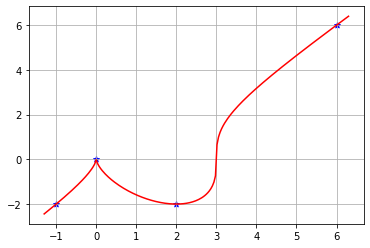

In [10]:
fig = plt.figure(10)
ax = fig.add_subplot(1, 1, 1)
ax.grid(True)
ax.plot(x, y, linewidth=1.5, color='red')
ax.scatter(pts_[0], pts_[1], linewidth=1, color='blue', marker='*')

plt.show()